<a href="https://colab.research.google.com/github/guimaraaes/data-science/blob/master/kmeans_spotify_data_with_audio_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BIBLIOTECAS

In [62]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore') 

#DESCRIÇÃO DA PROBLEMÁTICA
Esse notebook agrupa músicas do Spotify utilizando a técnica K-means com base nos dados dos áudios de músicas. No database o conjunto de dados contém

> recursos de áudio para mais de 20 mil músicas, recuperados do Spotify.

As variáveis do banco de dados analisado no arquivo *world_data.csv* e *brazil_data.csv* são:
*   **artist_name**: Nome do artista; 
*   **track_name**: Nome da trilha;
*   **track_id**: Id da trilha popularidade; 
*   **popularity**: popularidade da faixa (quanto mais alta, mais popular ela é);
*   **energy**: Danceability descreve como uma faixa é adequada para dançar com base em uma combinação de elementos musicais incluindo tempo, estabilidade de ritmo, força de batida e regularidade geral.;
*   **key**: A chave geral estimada da pista. Os inteiros mapeiam para arremessos usando a notação de classe de arremesso padrão. Por exemplo. 0 = C, 1 = C♯ / D ♭, 2 = D e assim por diante. Se nenhuma chave for detectada, o valor é -1.;
*   **loudness**: o volume geral de uma faixa em decibéis (dB). Os valores de intensidade são calculados em toda a trilha e são úteis para comparar a intensidade relativa das trilhas. Loudness é a qualidade de um som que é o principal correlato psicológico da força física (amplitude). Os valores típicos variam entre -60 e 0 db; 
*   **mode**: indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0;
*   **speechiness**: detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada for a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 será o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são compostas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, em seções ou em camadas, incluindo casos como música rap. Valores abaixo de 0,33 provavelmente representam música e outras faixas não semelhantes à fala;
*   **acousticness**: Uma medida de confiança de 0,0 a 1,0 para saber se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica;
*   **instrumentalness**: Prevê se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. As faixas de rap ou palavra falada são claramente “vocais”. Quanto mais próximo o valor da instrumentalidade estiver de 1,0, maior será a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0;
*   **liveness**: Detecta a presença de um público na gravação. Valores de vivacidade mais altos representam um aumento na probabilidade de a trilha ter sido executada ao vivo. Um valor acima de 0,8 fornece uma grande probabilidade de que a faixa esteja ao vivo.;
*   **valence**: Uma medida de 0,0 a 1,0 que descreve a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórico), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimido, irritado);
*   **tempo**: O tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, o tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média do tempo;
*   **duration_ms**: A duração da faixa em milissegundos;
*   **time_signature**: Uma estimativa de fórmula de compasso geral de uma faixa. A fórmula de compasso (metro) é uma convenção de notação para especificar quantas batidas existem em cada barra (ou compasso).

[referência ](https://github.com/rafaelnduarte/Spotify_K-Means_Clustering/blob/master/Spotify_Clulstering.ipynb)


#OBTENÇÃO DOS DADOS
Nessa etapa é descrito duas formas de obter os dados. Deve ser escolhida apenas uma e tomar atenção para quais linhas podem ser executadas sempre ou não.


##Kaggle e Google Drive
> Para realizar esse método é necessário ter uma conta no Kaggle e ter configurado o seu Google Drive para executar o download.


No código a seguir são realizadas as seguintes ações:
1.   conexão com o google drive;

2.   download dos dados obtidos no [Spotify Data With Audio Features](https://www.kaggle.com/rafaelnduarte/spotify-data-with-audio-features) para o drive (apenas na primeira vez);

3.   atribuição destes dados à variável *data_world* e *data_brazil* com o biblioteca pandas.

In [63]:
# # 1
# from google.colab import drive
# drive.mount('/content/gdrive')
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# %cd /content/gdrive/My Drive/Kaggle/spotify-data-with-audio-features/

# # 2
# #descomentar apenas para o primeiro download
# # !kaggle datasets download -d rafaelnduarte/spotify-data-with-audio-features
# # !unzip \*.zip  && rm *.zip

# # 3
# data_world=pd.read_csv('/content/gdrive/My Drive/Kaggle/spotify-data-with-audio-features/world_data.csv')
# data_brazil=pd.read_csv('/content/gdrive/My Drive/Kaggle/spotify-data-with-audio-features/brazil_data.csv')

## GitHub

Além disso, também disponibilizei uma cópia dos dados do Kaggle no meu GitHub.

In [64]:
data_world=pd.read_csv('https://raw.githubusercontent.com/guimaraaes/data-science/master/data/spotify-data-with-audio-features/world_data.csv')
data_brazil=pd.read_csv('https://raw.githubusercontent.com/guimaraaes/data-science/master/data/spotify-data-with-audio-features/brazil_data.csv')

# TRATAMENTO DOS DADOS

Nessa etapa são realizadas diversas análises para conseguir identificar quais modificações podem ser realizadas nos dados para conseguir manipular eles e adquirir *insights*. Primeiro observamos que ambos os Dataframes são compostos de 18 variáveis sendo que o do world com 9320 dados e o do brazil com 9239 dados,

In [65]:
print('Dimensão do DataFrame data_world')
print("variáveis: ", data_world.shape[1])
print("dados:     ", data_world.shape[0])

print('Dimensão do DataFrame data_brazil')
print("variáveis: ", data_brazil.shape[1])
print("dados:     ", data_brazil.shape[0])

Dimensão do DataFrame data_world
variáveis:  18
dados:      9320
Dimensão do DataFrame data_brazil
variáveis:  18
dados:      9239


Observamos também os primeiros dados do DataFrame data_world,

In [66]:
data_world.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Post Malone,Circles,21jGcNKet2qwijlDFuPiPb,99,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.5530,120.042,215280,4
1,1,Travis Scott,HIGHEST IN THE ROOM,3eekarcy7kvN4yt5ZFzltW,98,0.598,0.427,7,-8.764,0,0.0317,0.0546,0.000006,0.2100,0.0605,76.469,175721,4
2,2,Juice WRLD,Bandit (with YoungBoy Never Broke Again),6Gg1gjgKi2AK4e0qzsR7sd,93,0.474,0.631,5,-5.884,0,0.3430,0.0687,0.000000,0.1320,0.4250,180.051,189323,4
3,3,Arizona Zervas,ROXANNE,696DnlkuDOXcMAnKlTgXXK,97,0.621,0.601,6,-5.616,0,0.1480,0.0522,0.000000,0.4600,0.4570,116.735,163636,5
4,4,Selena Gomez,Lose You To Love Me,1HfMVBKM75vxSfsQ5VefZ5,98,0.505,0.340,4,-9.005,1,0.0438,0.5760,0.000000,0.2100,0.0916,101.993,206459,4


E os primeiros dados do DataFrame data_brazil,

In [67]:
data_brazil.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Dadá Boladão,Surtada - Remix Brega Funk,5F8ffc8KWKNawllr5WsW0r,86,0.832,0.550,5,-7.026,0,0.0587,0.2490,0.000008,0.182,0.881,154.064,152784,4
1,1,Marília Mendonça,Supera - Ao Vivo,3GmJxfnUDrIs1iCfKUELFz,85,0.665,0.743,4,-4.434,1,0.0567,0.0604,0.000000,0.959,0.658,131.573,147748,4
2,2,MC Du Black,Gaiola É o Troco,3Uq45ipGutypFPmETfaoaH,85,0.722,0.840,10,-3.240,0,0.0785,0.4200,0.000000,0.112,0.851,150.108,187246,4
3,3,Anitta,Some que ele vem atrás,2qD7VoDYcrAPY0cVEfpsR5,84,0.648,0.795,0,-5.536,0,0.1700,0.0748,0.000000,0.380,0.598,180.043,194771,4
4,4,Jorge & Mateus,Cheirosa - Ao Vivo,2PWjKmjyTZeDpmOUa3a5da,84,0.528,0.870,11,-3.123,1,0.0851,0.2400,0.000000,0.333,0.714,152.370,181930,4


A seguir vamos apagar o coluna com o valor do índice repetido e também a coluna track_id que serve apenas como identificar único da música no banco de dados. Como as variáveis tempo e duration_ms representam o mesmo valor, apenas em unidades diferentes, a variável duration_ms também será apagada.

In [68]:
data_world.drop(data_world.columns[[0, 3]], axis=1, inplace=True)
data_brazil.drop(data_brazil.columns[[0, 3]], axis=1, inplace=True)

Ao verificar o somatório dos valores nulos tanto para DataFrame data_world como para data_brazil todos as músicas possuem valores para todas as variáveis.

In [69]:
data_world.isnull().sum()

artist_name         0
track_name          0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [70]:
data_brazil.isnull().sum()

artist_name         0
track_name          0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

Já quando verificamos os valores únicos dos DataFrames percebemos que algumas variáveis como key, mode e time_signature são categoricas, pois é pequena a quantidade de valores assumidos nessas variáveis pelas músicas.

In [71]:
data_world.nunique()

artist_name         2626
track_name          8975
popularity           101
danceability         923
energy              1698
key                   12
loudness            7051
mode                   2
speechiness         1224
acousticness        2289
instrumentalness    2550
liveness            1166
valence             1310
tempo               8335
duration_ms         8488
time_signature         5
dtype: int64

In [72]:
data_brazil.nunique()

artist_name         2660
track_name          9018
popularity           101
danceability         906
energy              1656
key                   12
loudness            7148
mode                   2
speechiness         1199
acousticness        2183
instrumentalness    2544
liveness            1391
valence             1299
tempo               8127
duration_ms         8434
time_signature         5
dtype: int64

Analisando os valores das variáveis categóricas são definidos em valores inteiros e no caso da variável mode, o valor é em booleano (verdadeiro 1 ou falso 0). O valor assumido é decorrente na definição de cada variável apresentado no tópico da descrição da problemática.

In [73]:
data_world['key'].unique()

array([ 0,  7,  5,  6,  4, 11,  1, 10,  2,  8,  9,  3])

In [74]:
data_world['mode'].unique()

array([1, 0])

In [75]:
data_world['time_signature'].unique()

array([4, 5, 1, 3, 0])

#DESCRIÇÃO DOS DADOS

Nessa etapa vamos descrever os dados para conseguir entender e obter análises quantitativas do dataframe. Essa descrição é realizada diante da distribuição dos valores das variáveis e da correlação dos dados.

##Distribuição

Para conseguir visualizar como os dados estão distribuídos foi realizado o plot do histograma das variáveis numéricas dos DataFrames.

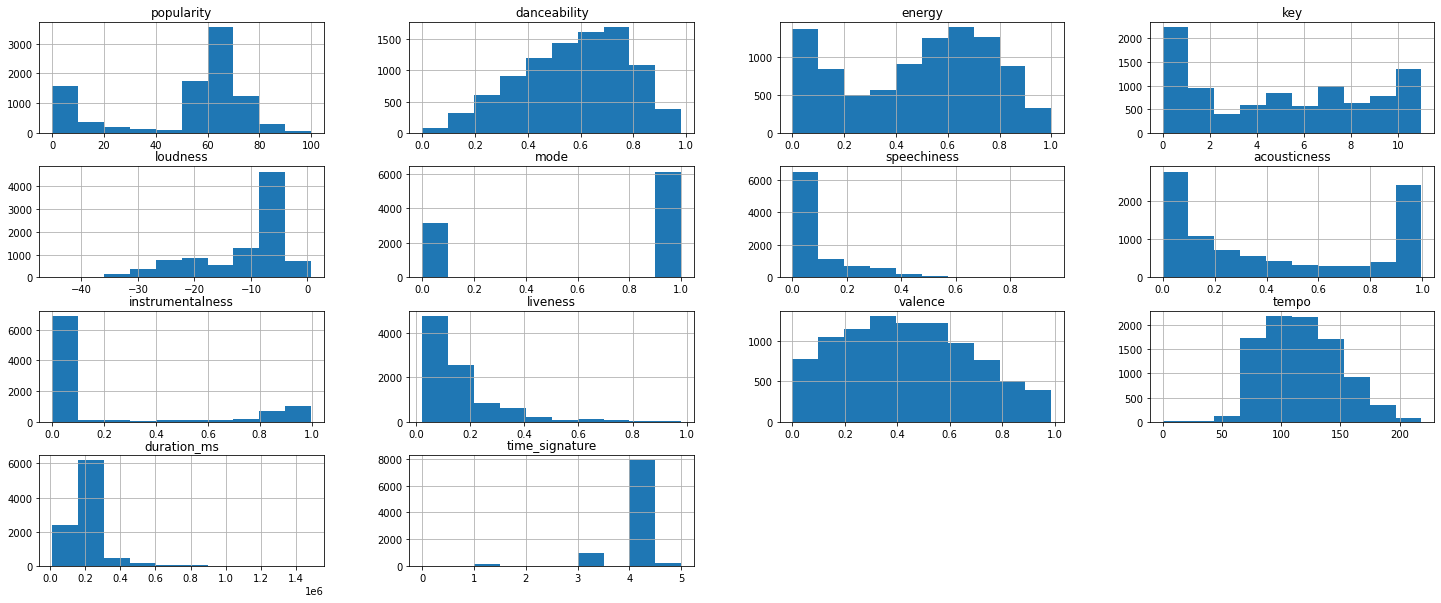

In [76]:
hist = data_world.hist(bins=10, figsize=(25,10))

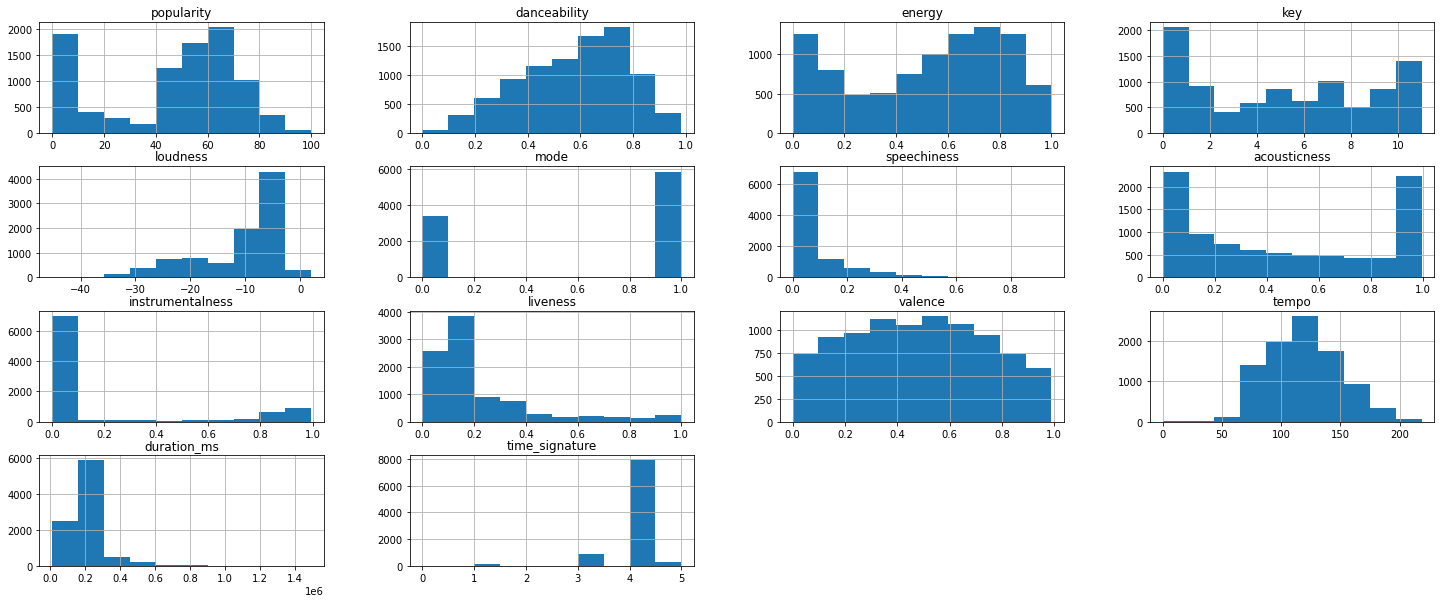

In [77]:
hist = data_brazil.hist(bins=10, figsize=(25,10))

O entendimento da distribuição pode ser obtido observando o tamanha das barras para os valores do eixo horizontal (valores assumidos para aquela variável nas músicas do dataframe). Quanto maior for o tamanho da barra, maior a quantidade de música que assumem aquele valor.

##Correlação
Já ao analisar a correlação dos dados percebemos que algumas variáveis possuem correlação positiva como,

*   popularity - danceability
*   popularity - energy
*   popularity - loudness
*   energy - danceability
*   energy - loudness
*   danceability - valence

Já as variáveis que possuem correlação negativa são,

*   acousticness - popularity
*   acousticness - danceability
*   acousticness - energy
*   acousticness - loudness
*   instrumentalness - danceability
*   instrumentalness - energy
*   instrumentalness - loudness

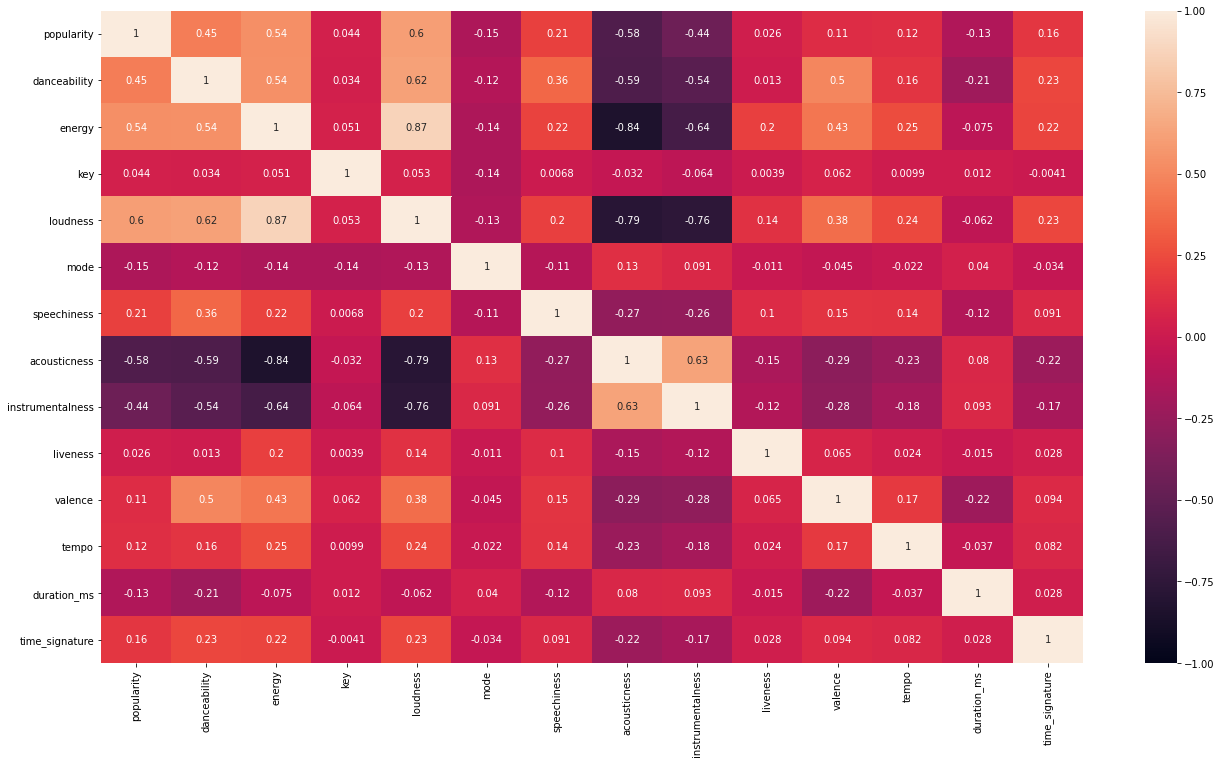

In [78]:
plt.figure(figsize=(22,12))
fig = sns.heatmap(data_world.corr(), vmax=1, vmin=-1, annot=True)

Ao visualizarmos os gráficos de regressão com o regplot das variáveis que se correlacionam temos para as correlações positivas,

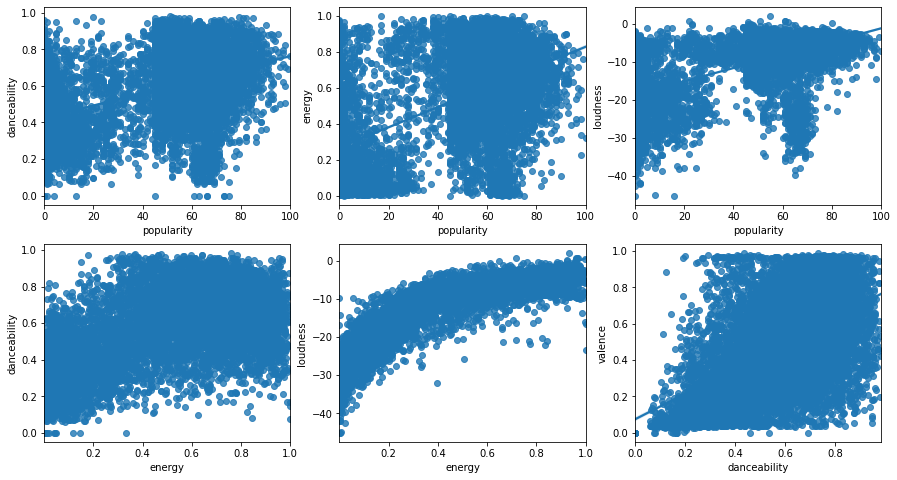

In [79]:
fig, axes = plt.subplots(2,3, figsize=(15,8))

sns.regplot(x=data_brazil['popularity'], y=data_brazil['danceability'], ax=axes[0,0])
sns.regplot(x=data_brazil['popularity'], y=data_brazil['energy'], ax=axes[0,1])
sns.regplot(x=data_brazil['popularity'], y=data_brazil['loudness'], ax=axes[0,2])

sns.regplot(x=data_brazil['energy'], y=data_brazil['danceability'], ax=axes[1,0])
sns.regplot(x=data_brazil['energy'], y=data_brazil['loudness'], ax=axes[1,1])
sns.regplot(x=data_brazil['danceability'], y=data_brazil['valence'], ax=axes[1,2])

Já para as variáveis com correlação negativa temos

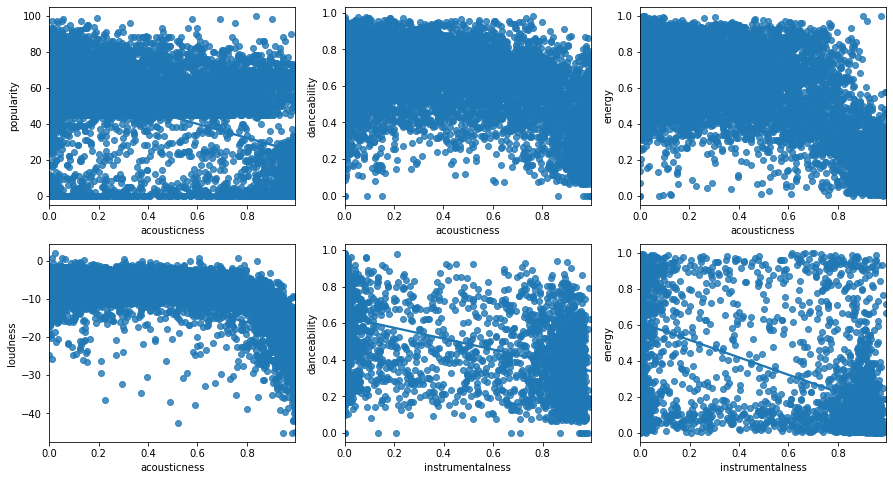

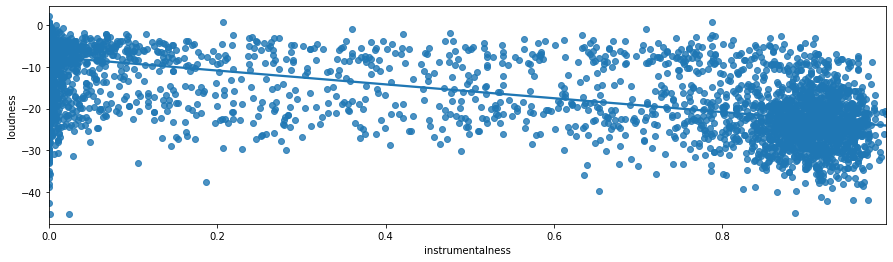

In [80]:
fig, axes = plt.subplots(2,3, figsize=(15,8))

sns.regplot(x=data_brazil['acousticness'], y=data_brazil['popularity'], ax=axes[0,0])
sns.regplot(x=data_brazil['acousticness'], y=data_brazil['danceability'], ax=axes[0,1])
sns.regplot(x=data_brazil['acousticness'], y=data_brazil['energy'], ax=axes[0,2])

sns.regplot(x=data_brazil['acousticness'], y=data_brazil['loudness'], ax=axes[1,0])
sns.regplot(x=data_brazil['instrumentalness'], y=data_brazil['danceability'], ax=axes[1,1])
sns.regplot(x=data_brazil['instrumentalness'], y=data_brazil['energy'], ax=axes[1,2])

fig, axes = plt.subplots(figsize=(15,4))
sns.regplot(x=data_brazil['instrumentalness'], y=data_brazil['loudness'])


Com os gráficos das correlações observamos que, como esperado, quanto mais próximo o fator correlacional é de 1 ou -1, mais próximo os dados estão da reta. Já a inclinação da reta é definida pelo sinal desse fator.


#REDIMENSIONAMENTO COM PCA

As técnicas de redimensionamento vão permitir agrupar mais de uma variável para obter uma nova variável que seja resultado da Análise de Componentes Principais (PCA em inglês) daquele grupo de variáveis. Nas linhas de código a seguir foram agrupadas variáveis em três grupos e realizado o tratamento com a biblioteca PCA.

No dataframe pca_data foram organizadas as três variáveis resultantes do tratamento com PCA.

In [81]:
variable1 = data_brazil[['energy', 'valence']]
variable2 = data_brazil[['mode', 'speechiness', 'acousticness', 'liveness', 'instrumentalness']]
variable3 = data_brazil[['tempo', 'duration_ms', 'time_signature']]

In [82]:
from sklearn.decomposition import PCA

In [83]:
pca = PCA(n_components =1)
var_PCA1 = pca.fit_transform(variable1)
var_PCA2 = pca.fit_transform(variable2)
var_PCA3 = pca.fit_transform(variable3)
var_PCA1=var_PCA1.reshape(var_PCA1.shape[0])
var_PCA2=var_PCA2.reshape(var_PCA2.shape[0])
var_PCA3=var_PCA3.reshape(var_PCA3.shape[0])

In [84]:
d = list(zip(var_PCA1, var_PCA2, var_PCA3))
pca_data = pd.DataFrame(d, columns=['var1','var2','var3'])
pca_data

,var1,var2,var3
0,-0.269710,0.682073,-52949.264230
1,-0.284450,-0.042825,-57985.263857
2,-0.479726,0.606588,-18487.264169
3,-0.288472,0.768369,-10962.264665
4,-0.418998,-0.138943,-23803.264206
...,...,...,...
9234,-0.164554,0.788928,-79254.263327
9235,-0.365203,-0.338405,-14120.264927
9236,0.498823,-0.573079,-65019.262955
9237,0.372641,-0.773999,-10233.263385


Agrupando as novas variáveis com as variáveis do dataframe que não passaram por PCA temos,

In [85]:
pca_data = pd.concat([data_brazil['artist_name'], data_brazil['track_name'], pca_data, data_brazil['popularity'], data_brazil['loudness'], data_brazil['danceability']], axis=1)
pca_data

,artist_name,track_name,var1,var2,var3,popularity,loudness,danceability
0,Dadá Boladão,Surtada - Remix Brega Funk,-0.269710,0.682073,-52949.264230,86,-7.026,0.832
1,Marília Mendonça,Supera - Ao Vivo,-0.284450,-0.042825,-57985.263857,85,-4.434,0.665
2,MC Du Black,Gaiola É o Troco,-0.479726,0.606588,-18487.264169,85,-3.240,0.722
3,Anitta,Some que ele vem atrás,-0.288472,0.768369,-10962.264665,84,-5.536,0.648
4,Jorge & Mateus,Cheirosa - Ao Vivo,-0.418998,-0.138943,-23803.264206,84,-3.123,0.528
...,...,...,...,...,...,...,...,...
9234,DeathbyRomy,Dangerous (feat. blackbear),-0.164554,0.788928,-79254.263327,63,-6.219,0.430
9235,Lasso,Subtítulos,-0.365203,-0.338405,-14120.264927,75,-3.807,0.631
9236,_tag,busking,0.498823,-0.573079,-65019.262955,65,-13.016,0.622
9237,Sabine Paulet,flâner,0.372641,-0.773999,-10233.263385,65,-19.551,0.407


No gráfico de correlações temos agora um número reduzido de variáveis. A var1 apresenta valor de correlação consideração para a variável loudness e danceability, enquanto que var2 apresenta apenas para loudness e var3 não apresenta correlação consideravel com nenhuma outra variável.

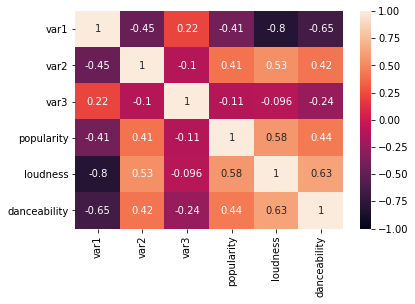

In [86]:
fig = sns.heatmap(pca_data.corr(), vmax=1, vmin=-1, annot=True)

No gráfico de regressão novamente que conforme o valor de correlação for mais próximo de 1 ou -1, os dados estarão distribuídos de forma mais próxima de uma reta ou não.

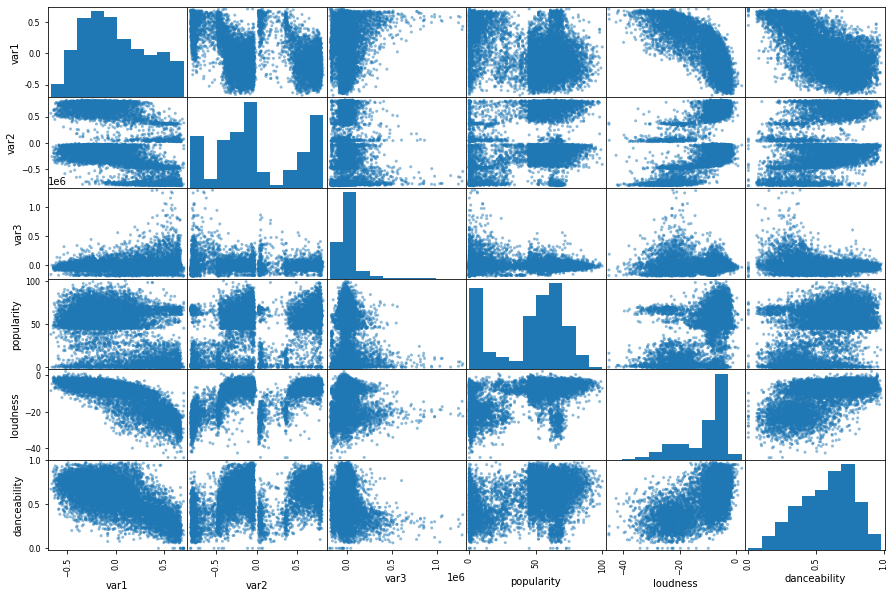

In [87]:
pd.plotting.scatter_matrix(pca_data, figsize=(15, 10));

# K-MEANS CLUSTERING

O processo de cluestering com k-means serve para agrupar um conjunto de dados em uma quantidade definida (k) de grupos. Esse agrupamento é realizado com algoritmos que analisando as variáveis disponibilizadas no dataframe e decidem, no caso desta aplicação, quais músicas são mais semelhantes. A seguir temos as bibliotecas utilizadas nessa etapa.

In [88]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

Para definir a quantidade k de cluters serão selecionadas apenas as variáveis numéricas do dataframe pca_data e será realizado o pré-processamento dos dados com o métido MinMaxScaler() para garantir que a escala dos valores sejam semelhantes.

In [89]:
spotify_num_pca = pca_data.drop(pca_data.columns[[0, 1]], axis=1)
spotify_cols_pca = pca_data.columns[2:]
scaler = MinMaxScaler();
scaled_pca = pd.DataFrame(scaler.fit_transform(spotify_num_pca))
scaled_pca.columns = spotify_cols_pca

O agrupamento com k-means visa agrupar dados de modo a evitar que a diferença entre as variáveis do grupo sejam muito dispersas. Para medir essa dispersão é utilizada a métrica WCSS definida como a soma dos quadrados dentro do cluster. Pelo método Kmeans() obtemos valores de wcss para valores k variando entre 1 e 15. Com esses dados será possivel traçar o gráfico denominado elbow method.

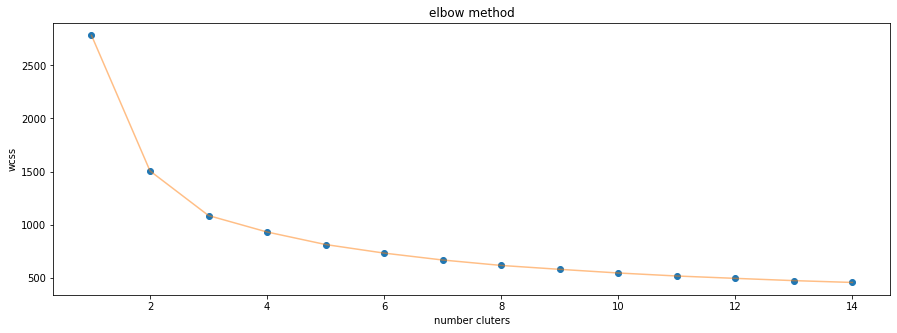

In [90]:
wcss_pca = []
for i in range(1,15):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  # kmeans.fit(spotify_num)
  kmeans.fit(scaled_pca)
  wcss_pca.append(kmeans.inertia_)
plt.figure(figsize=(15,5))
plt.plot(range(1,15), wcss_pca, 'o')
plt.plot(range(1,15), wcss_pca, '-', alpha=0.5)
plt.title('elbow method')
plt.xlabel('number cluters')
plt.ylabel('wcss')
plt.show()

Obtendo a diferença entre os pontos do gráfico anterior percebemos que para k=4 em diante a diferença entre os pontos deixa de ser significativa, logo, utilizando 4 agrupamentos garantimos que as músicas agrupadas nesses clusters possuem pouca dispersão para as variáveis analisadas.

In [91]:
print('Diferença entre os elementos:', np.diff(wcss_pca))

Diferença entre os elementos: [-1276.46786639  -419.96399758  -154.65986131  -118.02301344
   -80.68150695   -64.97245194   -51.13695165   -36.6821145
   -34.33536175   -28.39730495   -22.143002     -21.38335352
   -17.12608984]


Novamente para o método Kmeans(), mas com o valor fixo de 4 clusters, temos,

In [92]:
k_means = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = k_means.fit_predict(scaled_pca)
df_kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
df_kmeans.columns = ['k_cluster']
pca_data = pd.concat([pca_data, df_kmeans], axis=1)

In [93]:
pca_data

,artist_name,track_name,var1,var2,var3,popularity,loudness,danceability,k_cluster
0,Dadá Boladão,Surtada - Remix Brega Funk,-0.269710,0.682073,-52949.264230,86,-7.026,0.832,1
1,Marília Mendonça,Supera - Ao Vivo,-0.284450,-0.042825,-57985.263857,85,-4.434,0.665,0
2,MC Du Black,Gaiola É o Troco,-0.479726,0.606588,-18487.264169,85,-3.240,0.722,1
3,Anitta,Some que ele vem atrás,-0.288472,0.768369,-10962.264665,84,-5.536,0.648,1
4,Jorge & Mateus,Cheirosa - Ao Vivo,-0.418998,-0.138943,-23803.264206,84,-3.123,0.528,0
...,...,...,...,...,...,...,...,...,...
9234,DeathbyRomy,Dangerous (feat. blackbear),-0.164554,0.788928,-79254.263327,63,-6.219,0.430,1
9235,Lasso,Subtítulos,-0.365203,-0.338405,-14120.264927,75,-3.807,0.631,0
9236,_tag,busking,0.498823,-0.573079,-65019.262955,65,-13.016,0.622,3
9237,Sabine Paulet,flâner,0.372641,-0.773999,-10233.263385,65,-19.551,0.407,3


Observa-se agora a quandidade de músicas em cada grupo. Para o grupo 2 temos a maior quantidade de músicas (3367), enquanto que para o grupo 3 temos a menor quantidade de músicas (927).

In [94]:
pca_data.groupby('k_cluster').count()
pca_data['k_cluster'].value_counts()

0    3367
1    2803
2    2142
3     927
Name: k_cluster, dtype: int64

Obtendo as primeiras 20 músicas do cluster 3 temos que artistas como ANAVITÓRIA aparecem com frequência, mas são associados tb a artistas como  Fernando e Sorocava, Dilsinho e Billie Eilish. Em uma playlist do spotify é pouco provável que esses artistas apareçam em uma mesma playlist como semelhantes (observem a conclusão deste projeto).

In [95]:
pca_data[pca_data['k_cluster'] == 3].head(20)

,artist_name,track_name,var1,var2,var3,popularity,loudness,danceability,k_cluster
74,Selena Gomez,Lose You To Love Me,0.381866,-0.290150,725.736624,98,-9.005,0.505,3
108,Lewis Capaldi,Someone You Loved,0.112411,-0.369775,-23572.263503,96,-5.679,0.501,3
128,Billie Eilish,everything i wanted,0.379241,0.171396,39692.736321,98,-14.454,0.704,3
167,Casa Worship,A Casa É Sua,0.081434,-0.178428,356654.736066,71,-5.821,0.327,3
230,ANAVITÓRIA,relicário,0.404624,-0.408182,39805.735666,65,-12.001,0.431,3
246,Midian Lima,Não Pare,0.161860,-0.163716,87859.736152,69,-6.670,0.517,3
271,ANAVITÓRIA,pra você guardei o amor,0.338670,-0.447287,23051.737032,62,-13.962,0.579,3
283,Billie Eilish,when the party's over,0.496773,-0.465968,-9656.263055,90,-14.084,0.367,3
297,ANAVITÓRIA,as coisas tão mais lindas,0.364360,-0.408627,12541.736957,60,-13.905,0.490,3
298,ANAVITÓRIA,espatódea,0.454788,-0.480849,-43983.264264,60,-15.811,0.556,3


Selecioando a artista Beyoncé percebemos que ela aparece em três grupos (0, 1 e 3) dos 4 clusters.

In [96]:
pca_data[pca_data['artist_name'] == 'Beyoncé'].groupby('k_cluster').size()
# pca_data['artist_name'].describe(include=['O'])

k_cluster
0    24
1    16
3     4
dtype: int64

# CONCLUSÃO



Apesar do algoritmo parecer não estar funcionando, observa-se que o agrupamento é realizado apenas em variáveis que descrevem a música em termos numéricos. Para sugestão desse tipo seria possível que o agrupamente obtivesse mais êxito com variáveis relacionassem também a experiência de outros usuários e a categoria da música (rock, pop, nacional, internacional, indie, mpb), por exemplo.